## Regresión Bayesiana Lineal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget 'https://covid.ourworldindata.org/data/owid-covid-data.csv' -O 'COVID_world.csv'

--2022-09-13 00:28:18--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘COVID_world.csv’

COVID_world.csv         [                <=> ]  58.35M  18.5MB/s    in 3.1s    

2022-09-13 00:28:21 (18.5 MB/s) - ‘COVID_world.csv’ saved [61183631]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leemos el data set de COVID con Pandas
dataCovid = pd.read_csv('COVID_world.csv')

In [ ]:
#Observamos los 10 primeros registros el dataframe
dataCovid[:10]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#observamos los paises que estan en el dataframe
dataCovid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [ ]:
posDataGU = dataCovid['location'].str.contains('Guatemala')
dataCovidGU = dataCovid[posDataGU]
dataCovidGU[:-5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
78887,GTM,North America,Guatemala,2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
78888,GTM,North America,Guatemala,2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
78889,GTM,North America,Guatemala,2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
78890,GTM,North America,Guatemala,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
78891,GTM,North America,Guatemala,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79815,GTM,North America,Guatemala,2022-09-02,1104536.0,930.0,1423.429,19524.0,10.0,14.286,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79816,GTM,North America,Guatemala,2022-09-03,1104842.0,306.0,1187.429,19539.0,15.0,14.429,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79817,GTM,North America,Guatemala,2022-09-04,1104909.0,67.0,1049.429,19552.0,13.0,14.429,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN
79818,GTM,North America,Guatemala,2022-09-05,1105036.0,127.0,958.429,19567.0,15.0,15.286,...,NaN,NaN,76.665,0.6,74.3,0.663,NaN,NaN,NaN,NaN


In [ ]:
fecha_GU = dataCovidGU['date']
N_GU = np.shape(np.ravel(fecha_GU))
N_GU= N_GU[0]
x_GU = np.linspace(0, N_GU, N_GU) 

new_cases_GU =  dataCovidGU['new_cases']
new_deaths_GU = dataCovidGU['new_deaths']
new_cases_smooth_GU =  dataCovidGU['new_cases_smoothed']
new_deaths_smooth_GU =  dataCovidGU['new_deaths_smoothed']
new_deaths_per_millon_GU = dataCovidGU['new_deaths_per_million']
new_cases_per_millon_GU = dataCovidGU['new_cases_per_million']

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
def polyFBase(obs, M):
  idx = np.linspace(0, M-1, M)
  phi_x = np.power(obs, idx)
  return phi_x

def expFBase(obs, M):
  mu_s = np.linspace(0, 938, M) #CR=919, IS=934 NO=929
  s2 = 0.5
  phi_x = np.zeros_like(mu_s)
  for m in range(0, len(mu_s)):
    phi_x[m] = np.exp(-((obs-mu_s[m])**2)/(2*s2))
  phi_x[0] = 1.
  return phi_x

def sigmoidalFBase(obs, M):
  mu_s = np.linspace(0, 919, M) #CR=919, IS=934 NO=929
  s = 0.5
  phi_x = np.zeros_like(mu_s)
  for m in range(0, len(mu_s)):
    phi_x[m] = 1/(1+(np.exp(-((obs-mu_s[m])) / s)))
  phi_x[0] = 1.
  return phi_x

In [ ]:
def matrixPHIDesign(x_vect, M, fbase):
  N = len(x_vect)
  mPHI = np.zeros((N, M))
  for n in range(0, N):
    x_n = x_vect[n]
    if fbase == 'poly':
      vectPhi_xn = polyFBase(x_n, M)
    if fbase == 'exp':
      vectPhi_xn = expFBase(x_n, M)
    if fbase == 'sig':
      vectPhi_xn = sigmoidalFBase(x_n, M)
    mPHI[n,:] = vectPhi_xn
  return mPHI

In [ ]:
xNuevos = np.linspace(750,950,150)
x_train = x_GU
y_train = new_cases_smooth_GU
x_test = xNuevos

aux = np.isnan(y_train)
pos = np.where(aux==True)
y_train.iloc[pos[0]] = 0.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


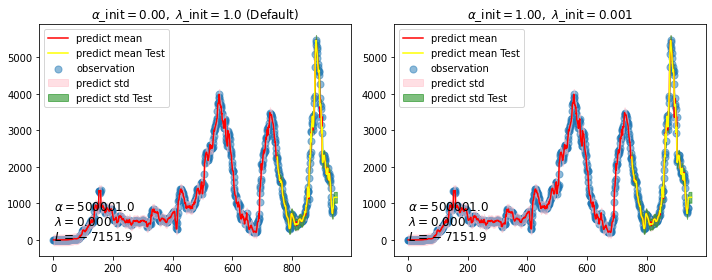

Error de predicción R2 es:  1.0
Error de predicción MSE es:  9.274991238229832e-18
Error de predicción MAE es:  1.86905454913114e-09


In [ ]:
nuestraFBase = True
if nuestraFBase == True:
  FlagFitNewData = True
  if FlagFitNewData == True:
    x_test = np.linspace(750,950,150)
  else:
    x_test = x_train
  X_train = matrixPHIDesign(x_train,M = 2000,fbase='exp')
  X_test = matrixPHIDesign(x_test,M = 2000,fbase='exp')
else:
  n_order = 5
  X_train = np.vander(x_train, n_order + 1, increasing=True)
  X_test = np.vander(x_test, n_order + 1, increasing=True)

reg = BayesianRidge(tol=1e-6, fit_intercept=True, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    # we compute both mean and std as a form of uncertainty
    ymean, ystd = reg.predict(X_train, return_std=True)
    ymeanTest, ystdTest = reg.predict(X_test, return_std=True)
    
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_train, ymean, color="red", label="predict mean")
    ax.fill_between(x_train, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.plot(x_test, ymeanTest, color="yellow", label="predict mean Test")
    ax.fill_between(x_test, ymeanTest-ystdTest, ymeanTest+ystdTest,
                    color="green", alpha=0.5, label="predict std Test")
    #ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

r2 = r2_score(y_train,ymean)
errorMSE = mean_squared_error(y_train,ymean)
errorMAE = mean_absolute_error(y_train,ymean)
print("Error de predicción R2 es: ",r2)
print("Error de predicción MSE es: ",errorMSE)
print("Error de predicción MAE es: ",errorMAE)